In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('..')

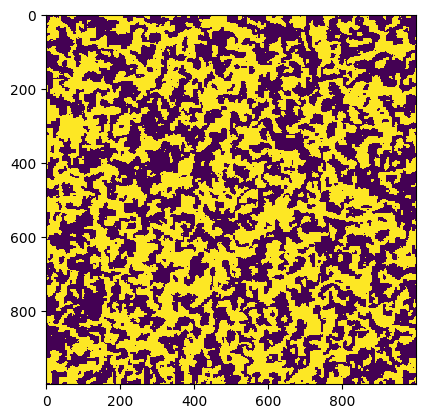

In [2]:
lattice = np.loadtxt("VSCode/final.txt")

plt.imshow(lattice, interpolation='none')
plt.show()

In [3]:
energy_c = -6520.78

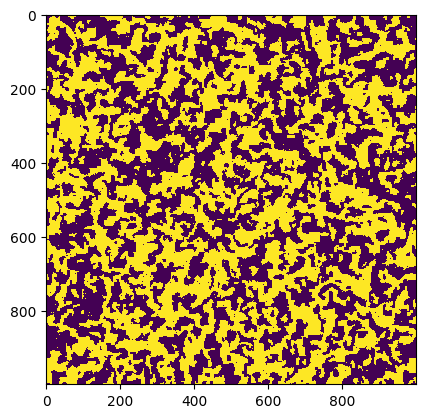

In [39]:
lattice = np.loadtxt("playground/final_lattice_0.txt")

plt.imshow(lattice, interpolation='none')
plt.show()

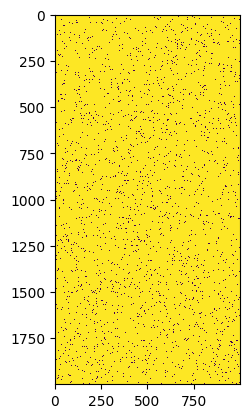

In [40]:
interactions = np.loadtxt("playground/final_bonds.txt")

plt.imshow(interactions, interpolation='none')
plt.show()

In [42]:
nx = ny = 1000

p = 0.031091730001
t = 8
inv_temp = 1.0 / t
coupling_constant = 0.5*t*np.log((1-p)/p)

ny2 = int(ny/2)

In [43]:
lattice = np.loadtxt("playground/final_lattice_0.txt")

interactions = np.loadtxt("playground/final_bonds.txt")

interactions = interactions.reshape(-1)

In [44]:
lattice_w = np.zeros((nx,int(ny/2)))
lattice_b = np.zeros((nx,int(ny/2)))

for i in range(nx):
        if (i%2 == 0):
            lattice_w[i,:] = lattice[i, 0::2]
            lattice_b[i,:] = lattice[i, 1::2]
        else:
            lattice_w[i,:] = lattice[i, 1::2]
            lattice_b[i,:] = lattice[i, 0::2]

In [45]:
lattice_w = lattice_w.reshape(-1)
lattice_b = lattice_b.reshape(-1)

In [46]:
energy = 0

for i in range(nx):
    for j in range(ny2):
        
        ipp = i+1 if (i+1<nx) else 0
        inn = i-1 if (i-1 >= 0) else nx-1
        jnn = j-1 if (j-1 >= 0) else ny2-1
        jpp = j+1 if (j+1<ny2) else 0
        
        
        icpp = 2*(nx-1)*ny2 + 2*(ny2*(i+1)+j)+(i+1)%2
        icnn = 2*(nx-1)*ny2 + 2*(ny2*(inn+1)+j)+(i+1)%2
        joff = jnn if (i%2) else jpp
        
        if (i % 2):
            jcouplingoff = 2 * (i * ny2 + joff) + 1
        else:
            if (j + 1 >= ny2):
                jcouplingoff = 2 * (i * ny2 + j + 1) - 1
            else:
                jcouplingoff = 2 * (i * ny2 + joff) - 1

        energy += -1*coupling_constant*lattice_b[i*ny2+j]*(lattice_w[inn*ny2+j]*interactions[icnn]+lattice_w[i*ny2+j]*interactions[2*(i*ny2+j)]+
                                                   lattice_w[ipp*ny2+j]*interactions[icpp]+lattice_w[i*ny2+joff]*interactions[jcouplingoff])

In [51]:
print(np.exp(-inv_temp*energy/nx**2))

21.444021523069623


In [48]:
-2.45236e+07-energy

-32.882783614099026